In [1]:
import os
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib_venn import venn2, venn3, venn3_circles

In [2]:
livi_dir = "/omics/groups/OE0540/internal/projects/LIVI"
benchmark_dir = os.path.join(livi_dir, "Benchmarks")

In [5]:
cis_eQTLGen = pd.read_csv(
    os.path.join(livi_dir, "eQTLGen", "cis_eQTLs", "eQTLGen_cis-eQTLs_trans-eQTLGen-disease-associated-SNPs_OneK1K-10K-HVG-HEX.tsv"),
    sep="\t"
)

In [3]:
trans_eQTLGen_sign = pd.read_csv(
    os.path.join(livi_dir, "eQTLGen", "trans_eQTLs", "trans-eQTLGen-FDR005_OneK1K.tsv"), 
    sep="\t"
)
trans_eQTLGen_sign = trans_eQTLGen_sign.assign(snp_id = [i[0]+":"+i[1] for i in trans_eQTLGen_sign.SNP_id1.str.split("_")])
trans_eQTLGen_sign = trans_eQTLGen_sign.assign(QTL = trans_eQTLGen_sign.apply(lambda x: x.Gene+"-"+x.snp_id, axis=1))

In [4]:
benchmarks = pd.DataFrame(columns=["discovered", "replicated_trans", "replicated_cis"])

In [7]:
LIVI = pd.read_csv(
    os.path.join(livi_dir, "OneK1K", "LIVI2_testing_results", "2024-12-05_10-20_LIVIcis-cell-state_zdim15_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best/2024-12-05_10-20_LIVI_700_factors_LMM_results_Ucontext_significant_BH_005_two-step.tsv"), 
    sep="\t"
)

benchmarks = pd.concat([benchmarks, 
                        pd.DataFrame([
                            [LIVI.SNP_id.nunique(),
                             LIVI.loc[LIVI.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique(), 
                             LIVI.loc[LIVI.SNP_id.isin(cis_eQTLGen.snp_id)].SNP_id.nunique()]
                        ], index=["LIVI"], columns=benchmarks.columns)],
                        axis=0)


In [8]:
pca_celltype = pd.read_csv(
    os.path.join(benchmark_dir, "PCA", "100_PCs", "All_celltypes_LMM_results_100-PCs-benchmark_significant_BH_005_two-step.tsv"),
    sep="\t"
)

benchmarks = pd.concat([benchmarks, 
                        pd.DataFrame([
                            [pca_celltype.SNP_id.nunique(),
                             pca_celltype.loc[pca_celltype.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique(), 
                             pca_celltype.loc[pca_celltype.SNP_id.isin(cis_eQTLGen.snp_id)].SNP_id.nunique()]
                        ], index=["PCA"], columns=benchmarks.columns)],
                        axis=0)


In [9]:
scITD = pd.read_csv(
    os.path.join(benchmark_dir, "scITD", "scITD_14kgenes_700_factors_900_donors", "scITD_14kgenes_700_factors_900_donors_LMM_results_Ucontext_significant_BH_005_two-step.tsv"), 
    sep="\t"
)

benchmarks = pd.concat([benchmarks, 
                        pd.DataFrame([
                            [scITD.SNP_id.nunique(),
                             scITD.loc[scITD.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique(), 
                             scITD.loc[scITD.SNP_id.isin(cis_eQTLGen.snp_id)].SNP_id.nunique()]
                        ], index=["scITD"], columns=benchmarks.columns)],
                        axis=0)



In [10]:
MrVI = pd.read_csv(
    os.path.join(benchmark_dir, "MrVI", "model_uz-attention_z500_u15", "model_uz-attention_z500_u15_LMM_results_Ucontext_significant_BH_005_two-step.tsv"), 
    sep="\t"
)

benchmarks = pd.concat([benchmarks, 
                        pd.DataFrame([
                            [MrVI.SNP_id.nunique(),
                             MrVI.loc[MrVI.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique(), 
                             MrVI.loc[MrVI.SNP_id.isin(cis_eQTLGen.snp_id)].SNP_id.nunique()]
                        ], index=["MrVI"], columns=benchmarks.columns)],
                        axis=0)



In [11]:
tensorqtl = pd.read_csv(
    os.path.join(benchmark_dir, "TensorQTL", "All_celltypes_results_tensorQTL-benchmark_significant_BH_005_two-step.tsv"),
    sep="\t"
)

benchmarks = pd.concat([benchmarks, 
                        pd.DataFrame([
                            [tensorqtl.SNP_id.nunique(),
                             tensorqtl.loc[tensorqtl.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique(), 
                             tensorqtl.loc[tensorqtl.SNP_id.isin(cis_eQTLGen.snp_id)].SNP_id.nunique()]
                        ], index=["single-gene"], columns=benchmarks.columns)],
                        axis=0)



In [12]:
benchmarks = benchmarks.reset_index(names="model")
# benchmarks = benchmarks.assign(
#     model_group = benchmarks.apply(
#         lambda x: "PCA" if "PCA" in x.model else "LIVI" if "LIVI" in x.model else "scITD" if "scITD" in x.model else "MrVI" if "MrVI" in x.model else "tensorQTL", 
#         axis=1
#     )
# )

benchmarks

,model,discovered,replicated_trans,replicated_cis
0,LIVI,506,396,505
1,PCA,257,227,247
2,scITD,363,292,362
3,MrVI,73,72,73
4,single-gene,299,62,151


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


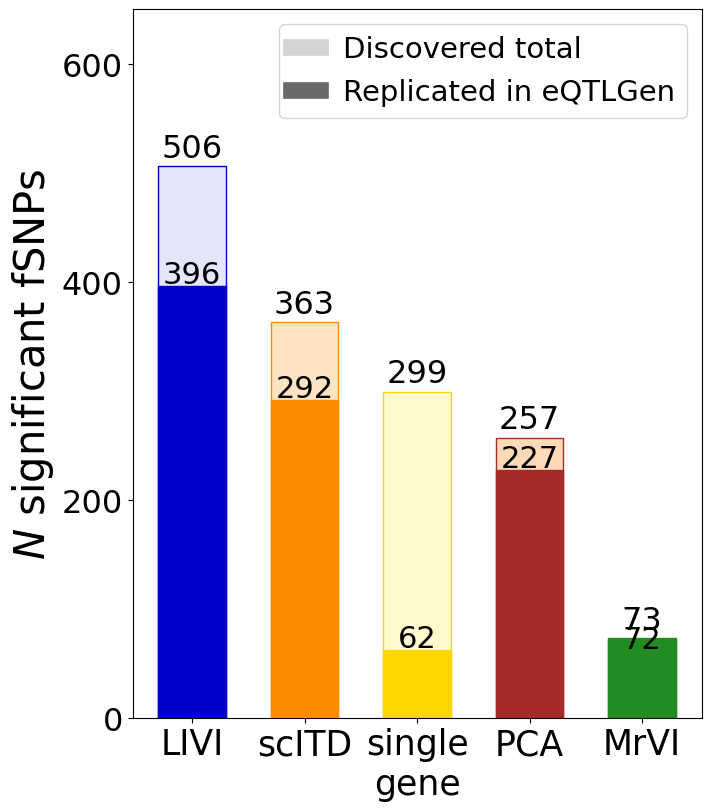

In [21]:
benchmarks_sorted = benchmarks.sort_values(by="discovered", ascending=False)
# Redefine the position dict based on the sorted dataframe
sorted_model_names = benchmarks_sorted["model"].unique()
sorted_position_dict = {name: i for i, name in enumerate(sorted_model_names)}

plot_model_names = [mn.replace("-", "\n") for mn in sorted_model_names]

model_colors = {
    "PCA": ["peachpuff", "brown"],
    "single-gene": ["lemonchiffon", "gold"],
    "LIVI": ["lavender", "mediumblue"],
    "scITD": ["bisque", "darkorange"],
    "MrVI": ["lightgreen", "forestgreen"]
}

legend_handles = []
legend_labels = []


fig, axs = plt.subplots(figsize=(7, 8), constrained_layout=True)

for i, row in benchmarks_sorted.iterrows():
    pos = sorted_position_dict[row["model"]]
    color_discovered = model_colors[row["model"]][0]
    color_replicated = model_colors[row["model"]][1]
    
    bar_discovered = axs.bar(pos, row["discovered"], color=color_discovered, width=0.6, edgecolor=color_replicated)  #"black")
    if f"{row['model']} - Discovered total" not in legend_labels:
        legend_handles.append(bar_discovered)
        legend_labels.append(f"{row['model']} - Discovered total")
    
    # Plot the replicated_trans bar on top of discovered
    bar_replicated = axs.bar(pos, row['discovered'] * (row["replicated_trans"] / row["discovered"]), color=color_replicated, width=0.6, edgecolor=color_replicated) # "black")
    if f"{row['model']} - Replicated in $trans$-eQTLGen" not in legend_labels:
        legend_handles.append(bar_replicated)
        legend_labels.append(f"{row['model']} - Replicated in $trans$-eQTLGen")

    # Annotate bars with exact values
    if row["model"] == "MrVI":
        axs.text(pos, row["discovered"]+2, str(row["discovered"]), ha="center", va="bottom", color="black", fontsize=23)
        axs.text(pos, row["discovered"] * (row["replicated_trans"] / row["discovered"])-14, str(row["replicated_trans"]), ha="center", va="bottom", color="black", fontsize=22)
    else:
        axs.text(pos, row["discovered"]+2, str(row["discovered"]), ha="center", va="bottom", color="black", fontsize=23)
        axs.text(pos, row["discovered"] * (row["replicated_trans"] / row["discovered"])-3, str(row["replicated_trans"]), ha="center", va="bottom", color="black", fontsize=22)

axs.set_ylim(bottom=0, top=650)
axs.set_xticks(range(len(sorted_model_names)), plot_model_names, rotation=0, fontsize=25)
# axs.set_yticks(axs.get_yticks(), axs.get_yticklabels(), fontsize=18)
axs.set_yticks(np.arange(0,700, 200), np.arange(0,700,200), fontsize=23)

# axs.legend(handles=[handle[0] for handle in legend_handles], labels=legend_labels, fontsize=19)

legend_handles = [
    Line2D([0], [0], color="lightgrey", lw=12, label="Discovered total"),
    Line2D([0], [0], color="dimgrey", lw=12, label="Replicated in eQTLGen"),
]
axs.legend(handles=legend_handles, fontsize=21, handlelength=1)


# axs.set_xlabel("Model", fontdict={"fontsize":20})
axs.set_ylabel("$N$ significant fSNPs", fontdict={"fontsize":30})
# axs.set_title("Number of SNPs with significant associations and replication in $trans$-eQTLGen",  fontdict={"fontsize":20, "fontweight":"bold"})
plt.savefig(os.path.join(benchmark_dir, "Suppl_Benchmarks_barplot_MrVI_each-model-best.png"),
            bbox_inches="tight", dpi=500, transparent=True)
plt.savefig(os.path.join(benchmark_dir, "Suppl_Benchmarks_barplot_MrVI_each-model-best.eps"),
            bbox_inches="tight", dpi=500, transparent=False)
plt.savefig(os.path.join(benchmark_dir, "Suppl_Benchmarks_barplot_MrVI_each-model-best.pdf"),
            bbox_inches="tight", dpi=500, transparent=True)

In [22]:
# TensorQTL one-step
tensorqtl_one_step = pd.read_csv(
    os.path.join(benchmark_dir, "TensorQTL", "All_celltypes_results_tensorQTL_significant_BH_005.tsv"), # "All_celltypes_results_tensorQTL_significant-within-celltype_BH_005.tsv"),
    sep="\t"
)

tensorqtl_one_step.SNP_id.nunique()

3006

In [23]:
# LIVI one-step
GxC_effects = pd.read_csv(
    os.path.join(benchmark_dir, "LIVI", "2024-12-05_10-20_LIVIcis-cell-state_zdim15_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best_LMM_results_BH-0.05_Ucontext.tsv"), 
    sep="\t"
)
GxC_effects.SNP_id.nunique()

941

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


None
None


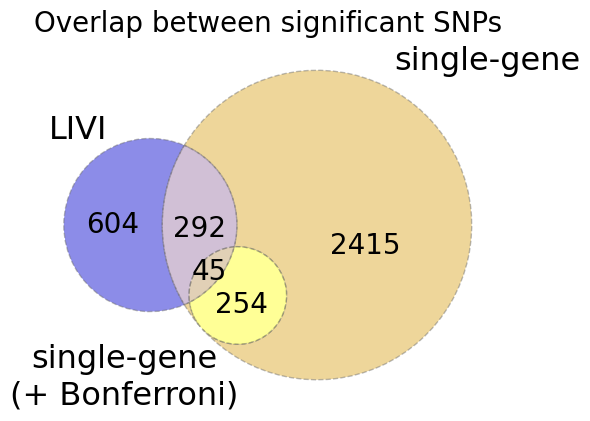

In [29]:
v = venn3(subsets=[set(GxC_effects.SNP_id), set(tensorqtl_one_step.SNP_id), set(tensorqtl.SNP_id)],
          set_labels=("LIVI", "single-gene", "single-gene\n(+ Bonferroni)"), set_colors=("mediumblue", "goldenrod", "gold"), 
          alpha=0.45)
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(20)
    except AttributeError:
        print(l)

v.set_labels[-1].set_position((-0.5, -0.38))
v.subset_labels[5].set_position((-0.11, -0.25))

for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("dimgrey")
        circle.set_linestyle("dashed")

plt.title("Overlap between significant SNPs", fontsize=20)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_vs_TensorQTL-2step.eps"), transparent=False, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_vs_TensorQTL-2step.png"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_vs_TensorQTL-2step.pdf"), transparent=True, bbox_inches="tight", dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


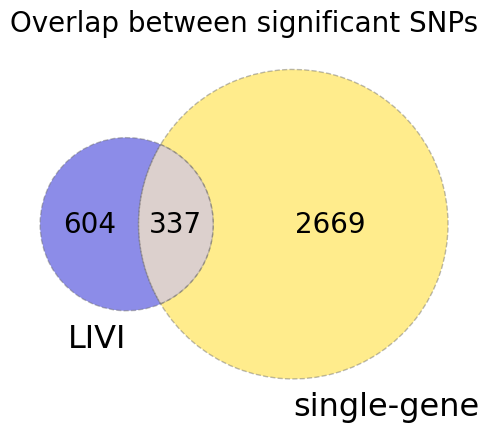

In [30]:
v = venn2(subsets=[set(GxC_effects.SNP_id), set(tensorqtl_one_step.SNP_id)],
          set_labels=("LIVI", "single-gene"), set_colors=("mediumblue", "gold"), 
          alpha=0.45)
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(20)
    except AttributeError:
        print(l)

# v.set_labels[-1].set_position((-0.5, -0.38))
# v.subset_labels[5].set_position((-0.11, -0.25))

for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("dimgrey")
        circle.set_linestyle("dashed")

plt.title("Overlap between significant SNPs", fontsize=20)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL.eps"), transparent=False, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL.png"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL.pdf"), transparent=True, bbox_inches="tight", dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


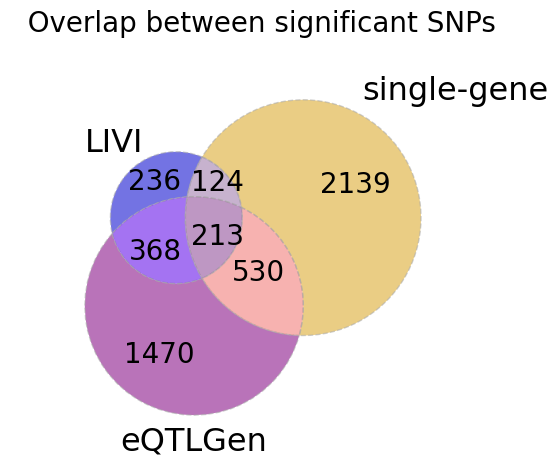

In [47]:
v = venn3(subsets=[set(GxC_effects.SNP_id), set(tensorqtl_one_step.SNP_id), set(trans_eQTLGen_sign.snp_id)],
          set_labels=("LIVI", "single-gene", "eQTLGen"), set_colors=("mediumblue", "goldenrod", "purple"), alpha=0.55)
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(20)
    except AttributeError:
        print(l)

v.subset_labels[0].set_position((-0.32, 0.26))

for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("darkgrey")
        circle.set_linestyle("dashed")

plt.title("  Overlap between significant SNPs\n", fontsize=20)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_vs_eQTLGen.eps"), transparent=False, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_vs_eQTLGen.png"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_vs_eQTLGen.pdf"), transparent=True, bbox_inches="tight", dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


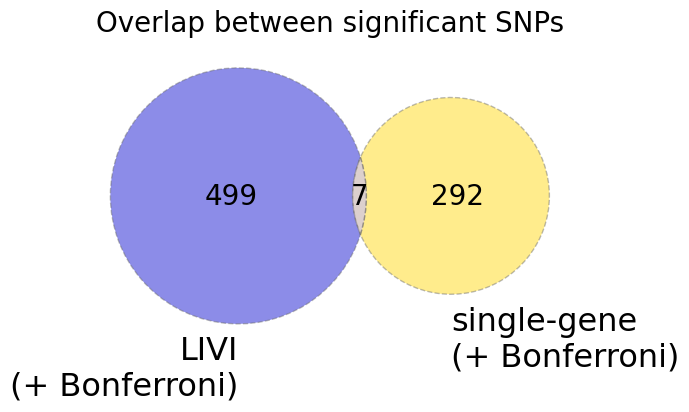

In [33]:
v = venn2(subsets=[set(LIVI.SNP_id), set(tensorqtl.SNP_id)],
          set_labels=("LIVI\n(+ Bonferroni)", "single-gene\n(+ Bonferroni)"), set_colors=("mediumblue", "gold"), 
          alpha=0.45)
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(20)
    except AttributeError:
        print(l)

# v.set_labels[-1].set_position((-0.5, -0.38))
# v.subset_labels[5].set_position((-0.11, -0.25))

for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("dimgrey")
        circle.set_linestyle("dashed")

plt.title("Overlap between significant SNPs", fontsize=20)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_2step.eps"), transparent=False, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_2step.png"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI_vs_TensorQTL_2step.pdf"), transparent=True, bbox_inches="tight", dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


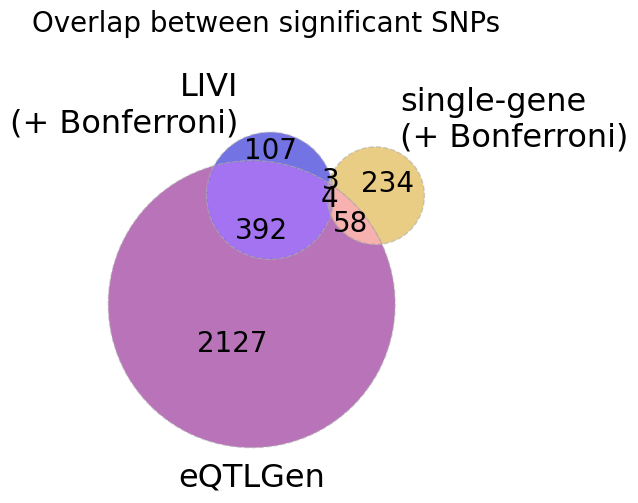

In [49]:
v = venn3(subsets=[set(LIVI.SNP_id), set(tensorqtl.SNP_id), set(trans_eQTLGen_sign.snp_id)],
          set_labels=("LIVI\n(+ Bonferroni)", "single-gene\n(+ Bonferroni)", "eQTLGen"), set_colors=("mediumblue", "goldenrod", "purple"), 
          alpha=0.55)
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(20)
    except AttributeError:
        print(l)

v.subset_labels[0].set_position((0.02, 0.47))
v.subset_labels[1].set_position((0.45, 0.35))

for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("darkgrey")
        circle.set_linestyle("dashed")

plt.title("Overlap between significant SNPs\n\n", fontsize=20)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI-2step_vs_TensorQTL-2step_vs_eQTLGen.eps"), transparent=False, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI-2step_vs_TensorQTL-2step_vs_eQTLGen.png"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(benchmark_dir, "SNP_overlap_LIVI-2step_vs_TensorQTL-2step_vs_eQTLGen.pdf"), transparent=True, bbox_inches="tight", dpi=600)